# **KNN(최근접 이웃)**
* 분류와 회귀 모두 지원

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing, load_boston

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류
* 입력 데이터와 가장 가까운 k개의 훈련 데이터 포인터가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [ ]:
iris = load_iris()
df = pd.DataFrame(data= iris.data, columns = iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X, y = load_iris(return_X_y = True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.1, random_state=42)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_val_scale = scaler.fit_transform(X_val)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("테스트 데이터 점수 : {}".format(model.score(X_val, y_val)))

학습 데이터 점수 : 0.9703703703703703
테스트 데이터 점수 : 1.0


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("테스트 데이터 점수 : {}".format(model.score(X_val_scale, y_val)))

학습 데이터 점수 : 0.9555555555555556
테스트 데이터 점수 : 0.9333333333333333


In [ ]:
 cross_validate(
     estimator = KNeighborsClassifier(),
     X =X, y = y,
     cv = 5,
     n_jobs = multiprocessing.cpu_count(),
     verbose = True
 )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00131369, 0.00179648, 0.00103354, 0.00087428, 0.00074768]),
 'score_time': array([0.0031414 , 0.00454426, 0.00261688, 0.00271416, 0.00170422]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [ ]:
param_grid = [{'n_neighbors': [3,5,7],
               'weights':['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree','brute']
               }]

In [ ]:
gs= GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [ ]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9800000000000001


In [ ]:
def make_meshgrid(x, y , h =0.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
  return xx, yy
  
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy,Z,**params)

  return out


In [ ]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
 iris_comp_df = pd.DataFrame(data = X_comp)
 iris_comp_df['Target'] = y
 iris_comp_df

,0,1,Target
0,-11.254454,24.811289,0
1,-11.819263,27.207497,0
2,-11.148857,27.611917,0
3,-10.931661,27.844244,0
4,-10.801386,24.769289,0
...,...,...,...
145,6.762807,-14.605587,2
146,5.664861,-11.525529,2
147,6.323408,-13.777688,2
148,7.707511,-14.767438,2


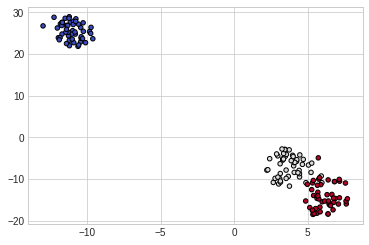

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:,1],
            c = y, cmap = plt.cm.coolwarm, s= 20, edgecolor = 'k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

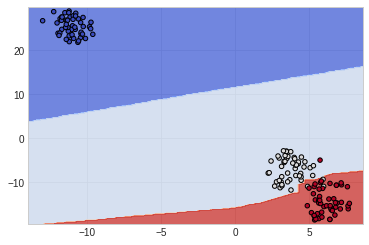

In [ ]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:, 0], X_comp[:,1], c =y, cmap =plt.cm.coolwarm, s= 20, edgecolors='k')